# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [4]:
df_cyber = pd.read_csv("ExportedDatasetsNew/cyberbullying_final.csv")

### 3.  Check first 10 lines

In [5]:
df_cyber.head(10)

,tweet_text,cyberbullying_type
0,words food crapilicious,0
1,white,0
2,classy whore red velvet cupcakes,0
3,meh p thanks heads concerned another angry dud...,0
4,isis account pretending kurdish account like i...,0
5,yes test god good bad indifferent weird whatev...,0
6,karma hope bites kat butt nasty,0
7,everything mostly priest,0
8,rebecca black drops school due bullying,0
9,bully flushes kd,0


### 4. Check Datasets type values and sum & drop duplicates

In [6]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69814 entries, 0 to 69813
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          69676 non-null  object
 1   cyberbullying_type  69814 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
df_cyber.shape

(69814, 2)

In [8]:
df_cyber.isnull().sum()

tweet_text            138
cyberbullying_type      0
dtype: int64

In [9]:
df_cyber.tweet_text.duplicated().sum()

9666

In [10]:
df_cyber.duplicated(subset='tweet_text').sum()

9666

In [11]:
df_cyber.duplicated(subset=['tweet_text','cyberbullying_type']).sum()

5339

In [12]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69814 entries, 0 to 69813
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          69676 non-null  object
 1   cyberbullying_type  69814 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [13]:
df_cyber['cyberbullying_type'].value_counts()

1    42834
0    26980
Name: cyberbullying_type, dtype: int64

In [14]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

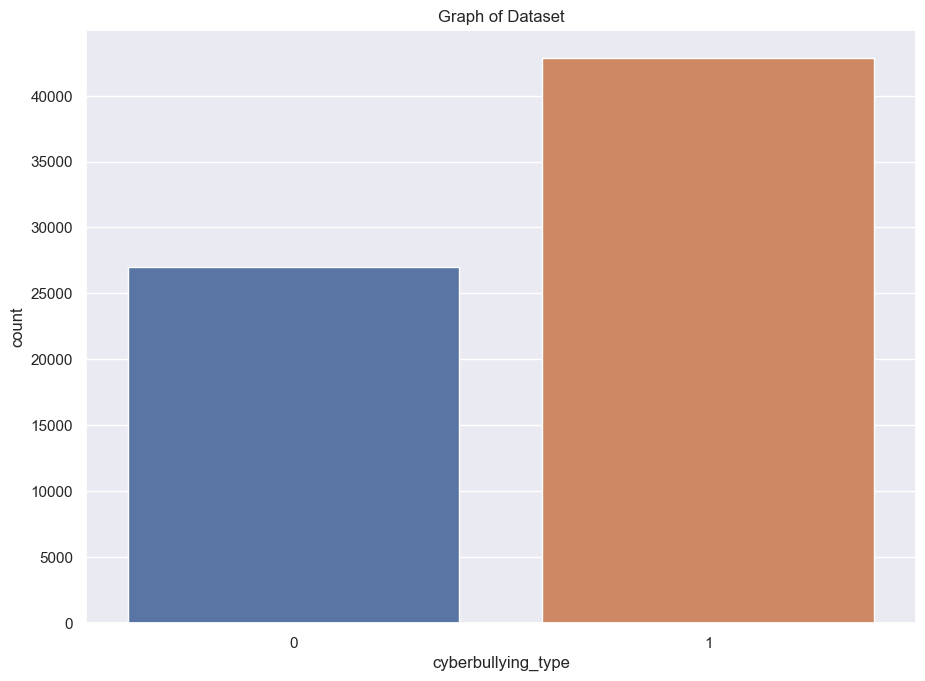

In [15]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=df_cyber).set(title="Graph of Dataset")

### 7. Stopwords

In [16]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [18]:
df_cyber.dropna(axis = 0)

,tweet_text,cyberbullying_type
0,words food crapilicious,0
1,white,0
2,classy whore red velvet cupcakes,0
3,meh p thanks heads concerned another angry dud...,0
4,isis account pretending kurdish account like i...,0
...,...,...
69809,happy birthday,0
69810,agree awful makes sense regardless last mistak...,0
69811,called yesterday guidance counselors office th...,0
69812,thanks,0


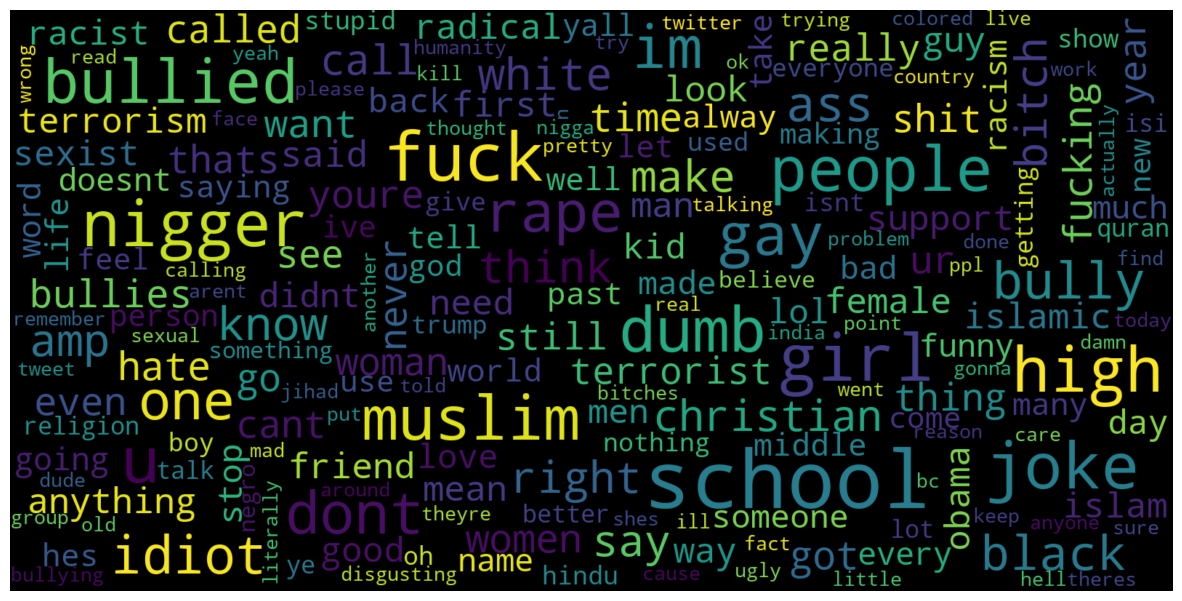

In [19]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

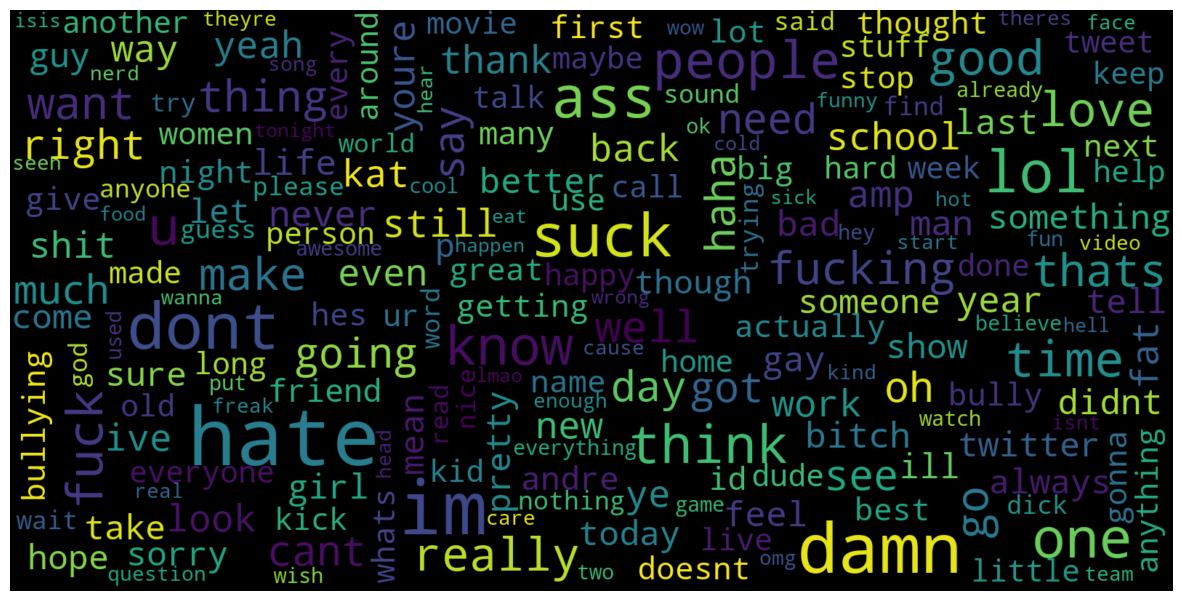

In [20]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

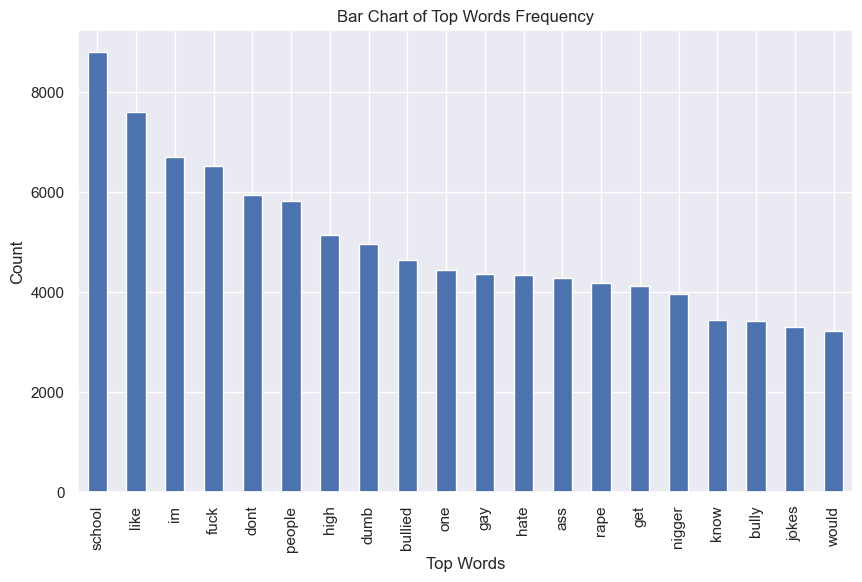

In [21]:

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['tweet_text'].astype('U'), 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['tweet_text'],
                                                    df_cyber['cyberbullying_type'],
                                                    test_size=0.2,
                                                    random_state=1)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [23]:
x_train.shape

(55851,)

In [24]:
x_test.shape

(13963,)

In [25]:
y_train.shape

(55851,)

In [26]:
y_test.shape

(13963,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train.astype('U'))
x_test = vectorization.transform(x_test.astype('U'))

In [29]:
print(x_train)

  (0, 40849)	1.0
  (1, 8091)	0.30630547837592415
  (1, 25027)	0.19928006467466006
  (1, 33004)	0.22509142171471894
  (1, 42456)	0.24164776819396827
  (1, 19765)	0.25059289297497334
  (1, 27004)	0.2810905878166304
  (1, 20484)	0.24870784396122173
  (1, 2120)	0.2512475231739814
  (1, 26631)	0.13925782303572634
  (1, 43338)	0.21354794227515203
  (1, 37519)	0.20160350262512144
  (1, 10985)	0.2652070852160732
  (1, 30029)	0.2936980330962773
  (1, 40463)	0.1293050746611806
  (1, 42834)	0.16798426240991446
  (1, 154)	0.29936710055637206
  (1, 41437)	0.30630547837592415
  (2, 27458)	0.34645853961210954
  (2, 11885)	0.3264367262951964
  (2, 34148)	0.3916482554735279
  (2, 15246)	0.30421847800951174
  (2, 37824)	0.7262701327175982
  (3, 8338)	0.23313206491023408
  (3, 32990)	0.15464461592184392
  :	:
  (55848, 20152)	0.1804255111863413
  (55848, 38928)	0.20783577747440027
  (55848, 30026)	0.21750201208487713
  (55848, 167)	0.17429059719987697
  (55848, 7022)	0.17644241321745013
  (55848, 16313)	

In [30]:
print(x_test)

  (0, 44034)	0.1670913543330503
  (0, 42739)	0.2693805053548643
  (0, 40276)	0.29099005238369907
  (0, 38409)	0.15824795419855606
  (0, 38310)	0.32470781231670726
  (0, 36027)	0.2816418445195737
  (0, 35148)	0.15627173262394708
  (0, 30421)	0.30087963818691066
  (0, 25253)	0.3863027489028854
  (0, 22991)	0.27237167707182547
  (0, 21994)	0.3863027489028854
  (0, 1432)	0.15200293344622978
  (0, 861)	0.3071472678112459
  (1, 44719)	0.7469749334501897
  (1, 35639)	0.6648522007161325
  (2, 34671)	0.3178808090648239
  (2, 28148)	0.22944405290611736
  (2, 27458)	0.35167125853466263
  (2, 23924)	0.291239593560093
  (2, 19285)	0.3530385263022758
  (2, 18054)	0.23628532735632252
  (2, 16943)	0.2667531755376863
  (2, 15246)	0.15439783235085427
  (2, 11885)	0.3313482025776986
  (2, 8794)	0.2583303179269631
  :	:
  (13959, 23426)	0.27315610538851404
  (13959, 18734)	0.31250750998507576
  (13959, 6551)	0.41302536397094175
  (13959, 4754)	0.4160870946963531
  (13959, 4307)	0.3158589969311599
  (13960

### Logistic Regression (LR)

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.864675654867415
0.8130774188927881


C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      5863
           1       0.82      0.87      0.84      8100

    accuracy                           0.81     13963
   macro avg       0.81      0.80      0.81     13963
weighted avg       0.81      0.81      0.81     13963



### Desicion Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9480940359169935
0.767098761011244


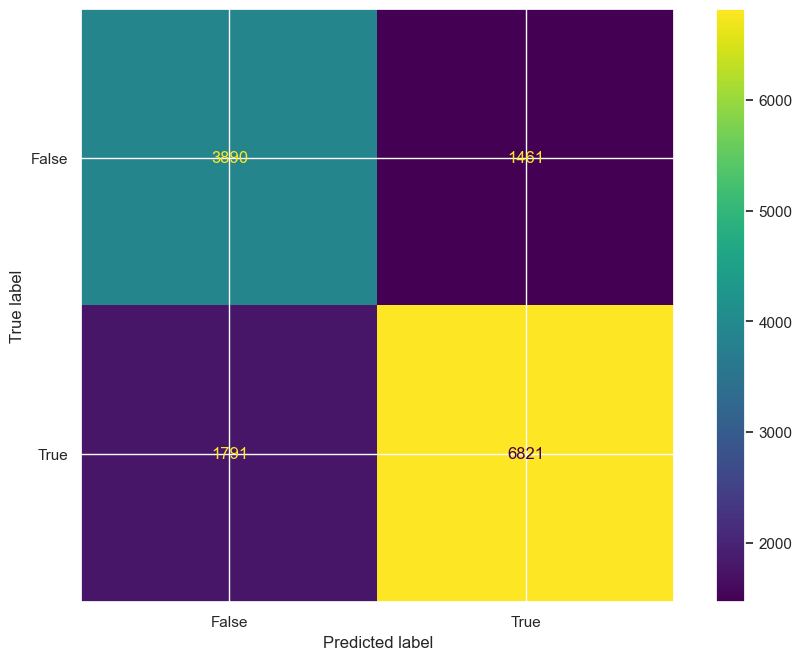

In [34]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [35]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.73      0.68      0.71      5681
           1       0.79      0.82      0.81      8282

    accuracy                           0.77     13963
   macro avg       0.76      0.75      0.76     13963
weighted avg       0.77      0.77      0.77     13963



### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9476822259225439
0.7848599871087875


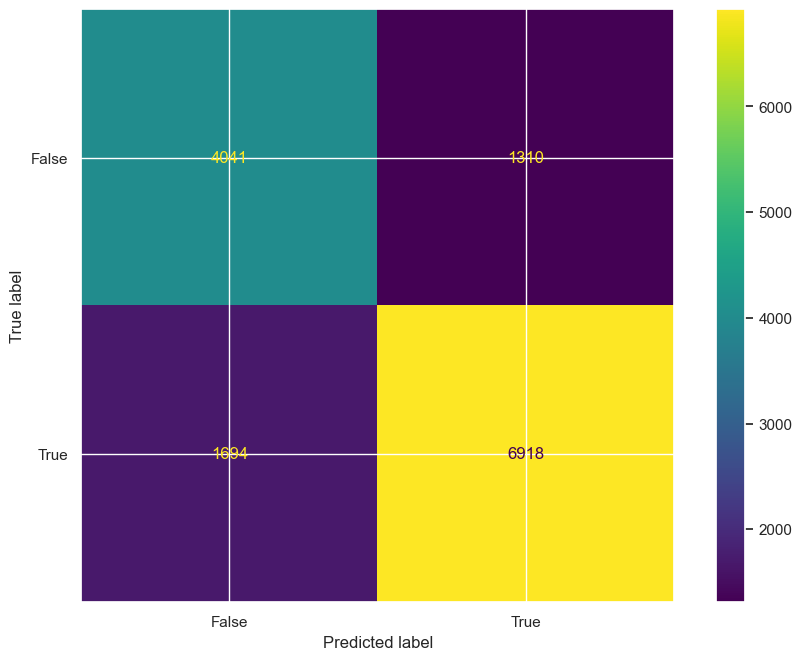

In [37]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [38]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      5735
           1       0.80      0.84      0.82      8228

    accuracy                           0.78     13963
   macro avg       0.78      0.77      0.78     13963
weighted avg       0.78      0.78      0.78     13963



### XGBoost

In [39]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8379975291400333
0.8189500823605242


In [41]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      6943
           1       0.76      0.93      0.84      7020

    accuracy                           0.82     13963
   macro avg       0.84      0.82      0.82     13963
weighted avg       0.84      0.82      0.82     13963



### Multinomial Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8172279815938838
0.7521306309532335


In [43]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.48      0.79      0.60      3218
           1       0.92      0.74      0.82     10745

    accuracy                           0.75     13963
   macro avg       0.70      0.77      0.71     13963
weighted avg       0.82      0.75      0.77     13963



### Support Vector Machine

In [44]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8827415802760917
0.8147962472248084


In [45]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      6063
           1       0.81      0.88      0.84      7900

    accuracy                           0.81     13963
   macro avg       0.82      0.80      0.81     13963
weighted avg       0.82      0.81      0.81     13963



### K-Nearest Neighbours

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.4596157633703962
0.4400916708443744


In [47]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.40      0.57     12835
           1       0.11      0.85      0.20      1128

    accuracy                           0.44     13963
   macro avg       0.54      0.63      0.38     13963
weighted avg       0.90      0.44      0.54     13963



### Bagging Decision Tree (Ensemble Learning I)

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.980875
0.8487878030492377


In [49]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2049
           1       0.92      0.75      0.83      1952

    accuracy                           0.85      4001
   macro avg       0.86      0.85      0.85      4001
weighted avg       0.86      0.85      0.85      4001



### Boosting Decision Tree (Ensemble Learning II)

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=5000,learning_rate=0.6)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.993875
0.9122719320169957


In [51]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2227
           1       0.94      0.85      0.90      1774

    accuracy                           0.91      4001
   macro avg       0.92      0.91      0.91      4001
weighted avg       0.91      0.91      0.91      4001

